# Daniel Frey - Python 401
## Stock Analysis - Apple Inc.

In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import datetime as dt
import requests

API_URL = 'https://api.iextrading.com/1.0'
STOCK = 'AAPL'

## Dataset Request

In [2]:
res = requests.get(f'{API_URL}/stock/{STOCK}/chart/5y')
data = res.json()
df = pd.DataFrame(data)

df['date'] = df['date'].apply((lambda x: pd.Timestamp(x)))

## Dataset Samples

In [3]:
df.head(5)

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap
0,-0.827309,0.000000,-1.146,71.3844,2013-12-19,72.1107,"Dec 19, 13",71.2887,72.0452,11462767,80239369,71.6091
1,0.597864,0.008374,0.838,71.9822,2013-12-20,72.3218,"Dec 20, 13",71.4313,71.5116,15586205,109103435,71.9809
2,2.762500,0.047073,3.838,74.7447,2013-12-23,74.8273,"Dec 23, 13",73.7837,74.4707,17903833,125326831,74.4027
3,-0.317288,0.042630,-0.424,74.4275,2013-12-24,74.9794,"Dec 24, 13",74.2124,74.7185,5984105,41888735,74.5717
4,-0.494284,0.035705,-0.664,73.9332,2013-12-26,74.6674,"Dec 26, 13",73.8645,74.4838,7286005,51002035,74.1287


In [4]:
df.describe()

,change,changeOverTime,changePercent,close,high,low,open,unadjustedVolume,volume,vwap
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1.258000e+03,1258.000000
mean,0.074609,0.767967,0.077395,126.205267,127.260977,125.101040,126.186758,3.695206e+07,4.306254e+07,126.232335
std,2.011206,0.550710,1.494487,39.312111,39.677456,38.948316,39.320805,2.051902e+07,2.379830e+07,39.298271
min,-14.688700,-0.082060,-7.993000,65.526600,65.755800,64.709600,64.923300,5.704942e+06,1.147592e+07,57.582200
25%,-0.714904,0.350009,-0.613500,96.369550,97.058000,95.537500,95.987300,2.357676e+07,2.660238e+07,96.338500
50%,0.067517,0.584753,0.061500,113.126650,113.812200,112.398600,113.106150,3.311536e+07,3.703142e+07,113.176550
75%,1.014775,1.170042,0.849250,154.907125,156.776725,153.655500,155.269725,4.645314e+07,5.246383e+07,155.682850
max,11.132000,2.239687,8.198000,231.263100,232.658200,228.981100,229.977600,1.898463e+08,2.668336e+08,231.426900


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 12 columns):
change              1258 non-null float64
changeOverTime      1258 non-null float64
changePercent       1258 non-null float64
close               1258 non-null float64
date                1258 non-null datetime64[ns]
high                1258 non-null float64
label               1258 non-null object
low                 1258 non-null float64
open                1258 non-null float64
unadjustedVolume    1258 non-null int64
volume              1258 non-null int64
vwap                1258 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 118.0+ KB


## Split the data into test and train

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(df['date'], df['close'], test_size = 0.5, random_state=42)

Text(0.5, 1.0, 'Training set')

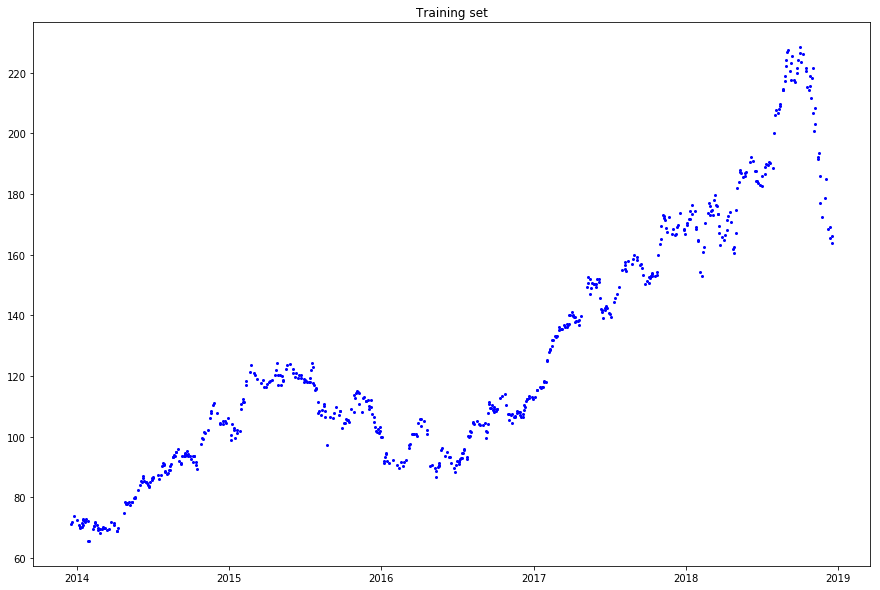

In [7]:
plt.figure(figsize=(15,10))
plt.plot(X_train, Y_train, 'bo', markersize=2)
plt.title('Training set')

Text(0.5, 1.0, 'Test set')

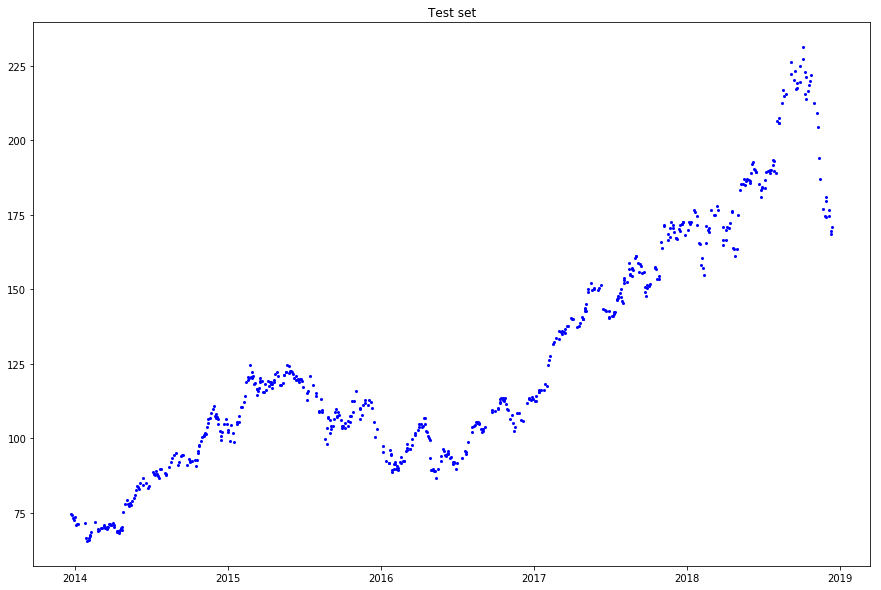

In [8]:
plt.figure(figsize=(15,10))
plt.plot(X_test, Y_test, 'bo', markersize=2)
plt.title('Test set')

## The Regression Model

In [9]:
# turns datetime values from x_train to ints representing year only
X_years = [matplotlib.dates.date2num(x) for x in X_train]

coefs_lin = poly.polyfit(X_years, Y_train, 1)
coefs_sq = poly.polyfit(X_years, Y_train, 2)
coefs_ten = poly.polyfit(X_years, Y_train, 11)

/Users/danielfrey/.local/share/virtualenvs/401_data_analysis-AY9bGMU5/lib/python3.6/site-packages/ipykernel_launcher.py:6: RankWarning: The fit may be poorly conditioned
  


In [10]:
X_line = np.linspace(matplotlib.dates.date2num(X_train.min()), matplotlib.dates.date2num(X_train.max()), 100000)
ffit_ln = poly.polyval(X_line, coefs_lin)
ffit_sq = poly.polyval(X_line, coefs_sq)
ffit_ten = poly.polyval(X_line, coefs_ten)

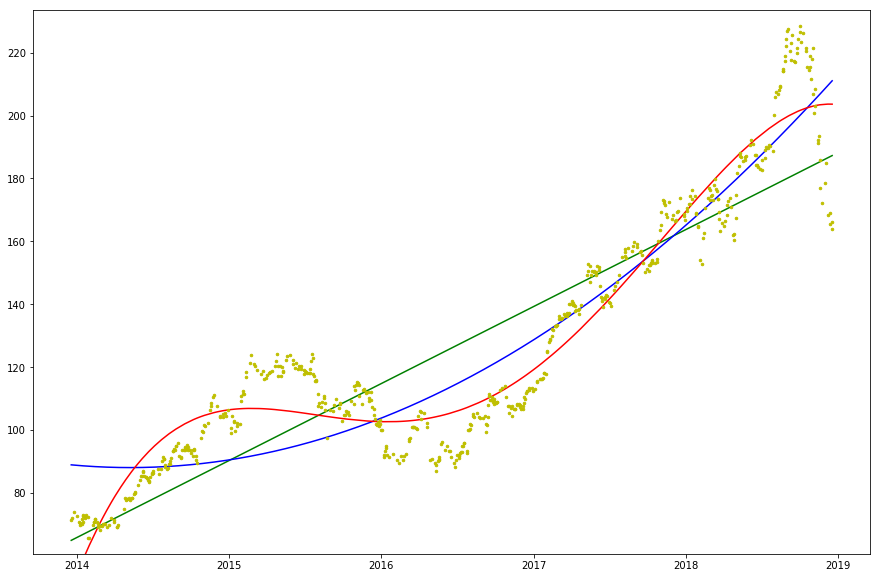

In [11]:
plt.figure(figsize=(15,10))
plt.ylim(min(Y_train - 5), max(Y_train + 5))
plt.plot(X_line, ffit_ln, 'g')
plt.plot(X_line, ffit_sq, 'b')
plt.plot(X_line, ffit_ten, 'r')

plt.plot(X_train, Y_train, 'y.', markersize=5)